A notebook to classify an image

In [1]:
import argparse
import re
import os
from edgetpu.classification.engine import ClassificationEngine
from PIL import Image, ImageChops
import matplotlib.pyplot as plt


Load a directory of images and attempt to match each of them and pause after each

In [3]:
#pics_dir = '/opt/repass/build/Camera1/2019-08-12'
pics_dir = '/opt/my_pics'
#my_model = '/opt/edgetpu/all_models/inception_v4_299_quant.tflite'
my_model = '/opt/edgetpu/all_models/mobilenet_v2_1.0_224_quant_edgetpu.tflite'
my_labels = '/opt/edgetpu/all_models/imagenet_labels.txt'


define function to read labels from text files from google example code

In [4]:
def ReadLabelFile(file_path):
  """Reads labels from text file and store it in a dict.

  Each line in the file contains id and description separted by colon or space.
  Example: '0:cat' or '0 cat'.

  Args:
    file_path: String, path to the label file.

  Returns:
    Dict of (int, string) which maps label id to description.
  """
  with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
  ret = {}
  for line in lines:
    pair = re.split(r'[:\s]+', line.strip(), maxsplit=1)
    ret[int(pair[0])] = pair[1].strip()
  return ret


Now the modified main program loop to classify each image

In [5]:
  # Prepare labels.
  labels = ReadLabelFile(my_labels)
# Initialize engine.
  engine = ClassificationEngine(my_model)



#![image_info](../../build/Camera1/2019-08-12/17-57-00.jpg "Sample Picture")
Now loop through all of the pictures in the pics directory and report any time there is a 50% or greater match

---------------------------
/opt/my_pics/IMG_20190701_053807.jpg
web site, website, internet site, site
Score :  0.67578125


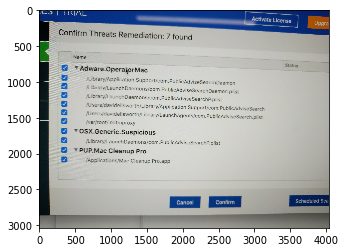

---------------------------
/opt/my_pics/IMG_20190707_165655.jpg
mountain bike, all-terrain bike, off-roader
Score :  0.734375


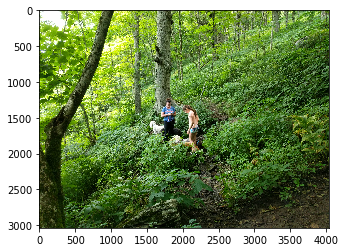

---------------------------
/opt/my_pics/IMG_20190707_165653.jpg
mountain bike, all-terrain bike, off-roader
Score :  0.65234375


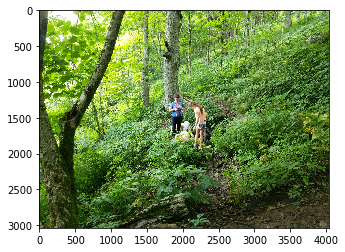

---------------------------
/opt/my_pics/IMG_20190806_184222.jpg
barn
Score :  0.58203125


In [6]:
for filename in os.listdir(pics_dir):
    
    # run inference
    img = Image.open(os.path.join(pics_dir, filename))
    for result in engine.ClassifyWithImage(img, top_k=3):
        if result[1] > 0.5:
            print('---------------------------')
            print(os.path.join(pics_dir, filename))
            print(labels[result[0]])
            print('Score : ', result[1])
            plt.imshow(img);
            plt.show();
    